In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from env import host, user, password

# Use the iris database to answer the following quesitons:

In [3]:
def get_db_url(username, hostname, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [6]:
query = '''
SELECT *
FROM measurements
'''
url = get_db_url(user, host, password,'iris_db')

measurements = pd.read_sql(query, url)

In [7]:
measurements.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [8]:
query = '''
SELECT *
FROM species
'''
species = pd.read_sql(query, url)

In [9]:
species.head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [11]:
plants = species.set_index('species_id').join(measurements.set_index('species_id'))

In [14]:
plants.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## What does the distribution of petal lengths look like?

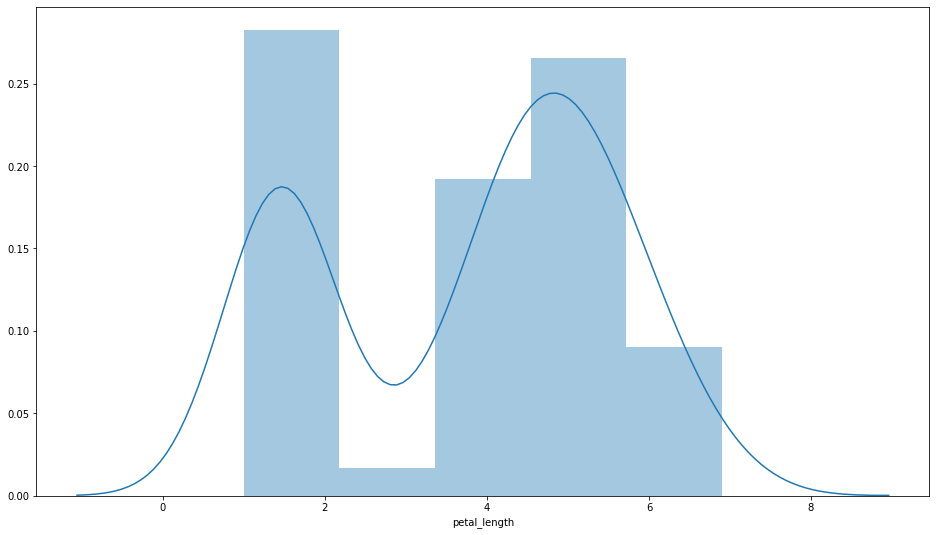

In [18]:
plt.figure(figsize=(16,9))
sns.distplot(plants.petal_length)
plt.show()

## Is there a correlation between petal length and petal width?

<Figure size 1152x648 with 0 Axes>

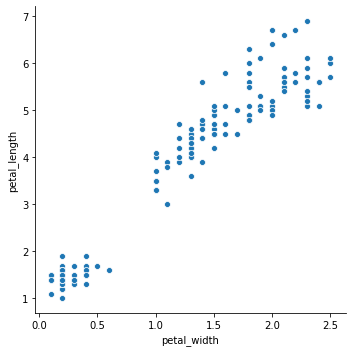

In [21]:
plt.figure(figsize=(16,9))
sns.relplot(x='petal_width', y='petal_length', data=plants)

## Would it be reasonable to predict species based on sepal width and sepal length?

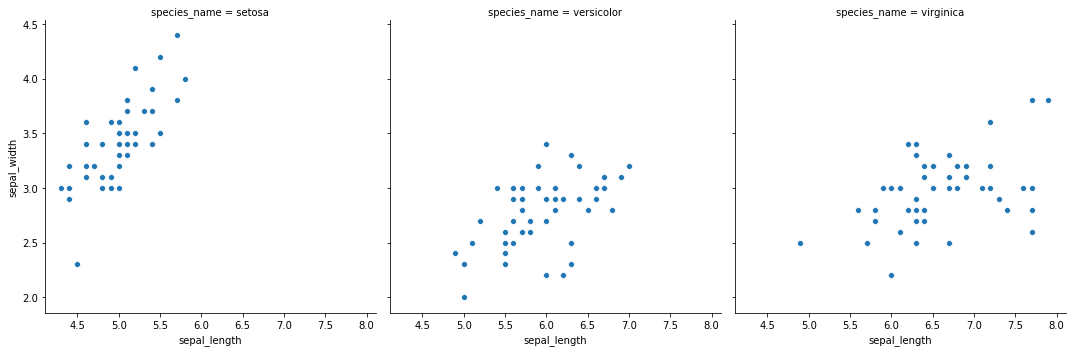

In [29]:
sns.relplot(x='sepal_length', y='sepal_width', col='species_name', data=plants)

## Which features would be best used to predict species?